## Hovmöller plot of ssh along the coast barotropic runs

In [18]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

In [19]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/02_SVB_barotropic_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/02_noSVB_barotropic/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels)

In [20]:
nx = 512
ny = 612
nz = 100
nt = 720

In [21]:
depth = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360

Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# No bay centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# bay centers mask
# centers mask
depthSVB = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)
dep_maskedSVB = np.ma.masked_values(depthSVB,0)
mask_depSVB = np.ma.getmask(dep_maskedSVB)

### 1. Find lon index of first water point from east to west for each lat

Find cells along lat where hFacC is 1.

In [22]:
lon_inds_off = np.argmax(np.squeeze(hFacCSVB[0,:,::-1].data), axis=1)

ini_lat_ind = 220 # Lat just above and outside SVB

lon_inds = np.ones_like(lon_inds_off[ini_lat_ind:])*nx - lon_inds_off[ini_lat_ind:]
lat_inds = np.ones_like(lon_inds)*ini_lat_ind + np.arange(len(lon_inds))

There are some points missing along the coast that have the same lat. Now find along lon:

In [23]:
lat_inds_off = np.argmax(np.squeeze(hFacCSVB[0,::-1,:].data), axis=0)
ini_lon_ind = 50 # Lon of land at N boundary

lat_inds_2 = np.ones_like(lat_inds_off[ini_lon_ind:])*ny - lat_inds_off[ini_lon_ind:]
lon_inds_2 = np.ones_like(lat_inds)*ini_lon_ind + np.arange(len(lat_inds))

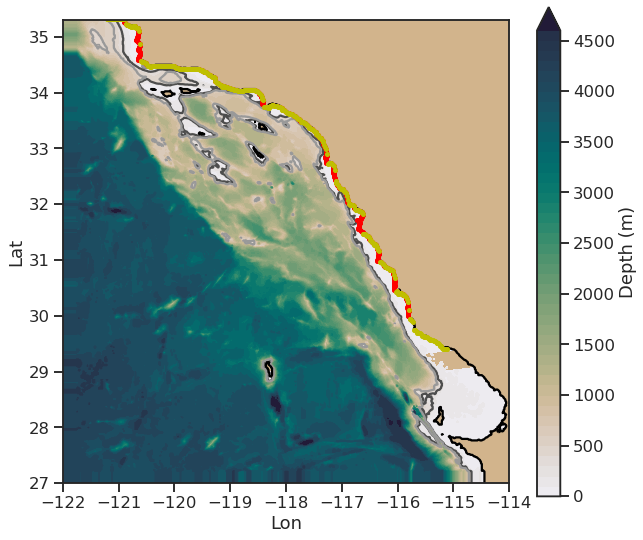

In [24]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj in zip(lon_inds,lat_inds):
    ax.plot(LON[0,ii-1],LAT[jj,0],'o', 
            markersize=4, color='r')
    #print('Depth at cell is %1.2f m' % (depth[jj,ii-1]))

# cells along coast(ish)
for ii,jj in zip(lon_inds_2,lat_inds_2):
    ax.plot(LON[0,ii],LAT[jj-1,0],'o', 
            markersize=4, color='y')
    #print('Depth at cell is %1.2f m' % (depth[jj,ii-1]))

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(27,35.3)
ax.set_aspect(1)

In [25]:
df = pd.read_csv('coastline_points_list.txt',names=['lon_ii','lat_jj'], header=1 )

397 221 Depth at cell is 4.00 m
397 222 Depth at cell is 4.00 m
397 223 Depth at cell is 6.00 m
397 224 Depth at cell is 6.00 m
397 225 Depth at cell is 8.00 m
397 226 Depth at cell is 6.00 m
398 227 Depth at cell is 0.00 m
398 228 Depth at cell is 4.00 m
397 229 Depth at cell is 20.00 m
397 230 Depth at cell is 10.00 m
396 231 Depth at cell is 26.20 m
396 232 Depth at cell is 20.00 m
397 233 Depth at cell is 2.00 m
397 234 Depth at cell is 4.00 m
397 235 Depth at cell is 4.00 m
397 236 Depth at cell is 4.00 m
397 237 Depth at cell is 4.00 m
397 238 Depth at cell is 6.00 m
397 239 Depth at cell is 4.00 m
396 240 Depth at cell is 17.20 m
396 241 Depth at cell is 12.20 m
396 242 Depth at cell is 6.00 m
395 243 Depth at cell is 14.60 m
395 244 Depth at cell is 12.20 m
395 245 Depth at cell is 8.00 m
394 246 Depth at cell is 17.20 m
393 247 Depth at cell is 17.20 m
392 248 Depth at cell is 17.20 m
391 249 Depth at cell is 12.20 m
385 250 Depth at cell is 2.00 m
386 250 Depth at cell is 4.0

297 454 Depth at cell is 12.20 m
296 455 Depth at cell is 14.60 m
295 456 Depth at cell is 14.60 m
294 457 Depth at cell is 14.60 m
294 458 Depth at cell is 8.00 m
293 459 Depth at cell is 12.20 m
292 460 Depth at cell is 12.20 m
291 461 Depth at cell is 14.60 m
291 462 Depth at cell is 10.00 m
290 463 Depth at cell is 10.00 m
289 464 Depth at cell is 12.20 m
288 465 Depth at cell is 12.20 m
287 466 Depth at cell is 14.60 m
287 467 Depth at cell is 8.00 m
285 468 Depth at cell is 12.20 m
286 468 Depth at cell is 12.20 m
283 469 Depth at cell is 14.60 m
284 469 Depth at cell is 10.00 m
282 470 Depth at cell is 14.60 m
281 471 Depth at cell is 14.60 m
281 472 Depth at cell is 12.20 m
280 473 Depth at cell is 10.00 m
279 474 Depth at cell is 10.00 m
277 475 Depth at cell is 14.60 m
278 475 Depth at cell is 10.00 m
274 476 Depth at cell is 29.70 m
275 476 Depth at cell is 14.60 m
276 476 Depth at cell is 10.00 m
273 477 Depth at cell is 37.70 m
273 478 Depth at cell is 20.00 m
272 479 Dept

86 585 Depth at cell is 2.00 m
86 586 Depth at cell is 4.00 m
86 587 Depth at cell is 6.00 m
87 588 Depth at cell is 2.00 m
87 589 Depth at cell is 4.00 m
87 590 Depth at cell is 6.00 m
87 591 Depth at cell is 8.00 m
87 592 Depth at cell is 10.00 m
87 593 Depth at cell is 10.00 m
88 594 Depth at cell is 2.00 m
88 595 Depth at cell is 4.00 m
88 596 Depth at cell is 4.00 m
87 597 Depth at cell is 14.60 m
87 598 Depth at cell is 12.20 m
87 599 Depth at cell is 10.00 m
86 600 Depth at cell is 20.00 m
84 601 Depth at cell is 26.20 m
85 601 Depth at cell is 10.00 m
78 602 Depth at cell is 20.00 m
79 602 Depth at cell is 8.00 m
83 602 Depth at cell is 33.50 m
76 603 Depth at cell is 17.20 m
77 603 Depth at cell is 12.20 m
80 603 Depth at cell is 2.00 m
81 603 Depth at cell is 8.00 m
82 603 Depth at cell is 8.00 m
74 604 Depth at cell is 37.70 m
75 604 Depth at cell is 20.00 m
73 605 Depth at cell is 33.50 m
72 606 Depth at cell is 37.70 m
71 607 Depth at cell is 33.50 m
71 608 Depth at cell i

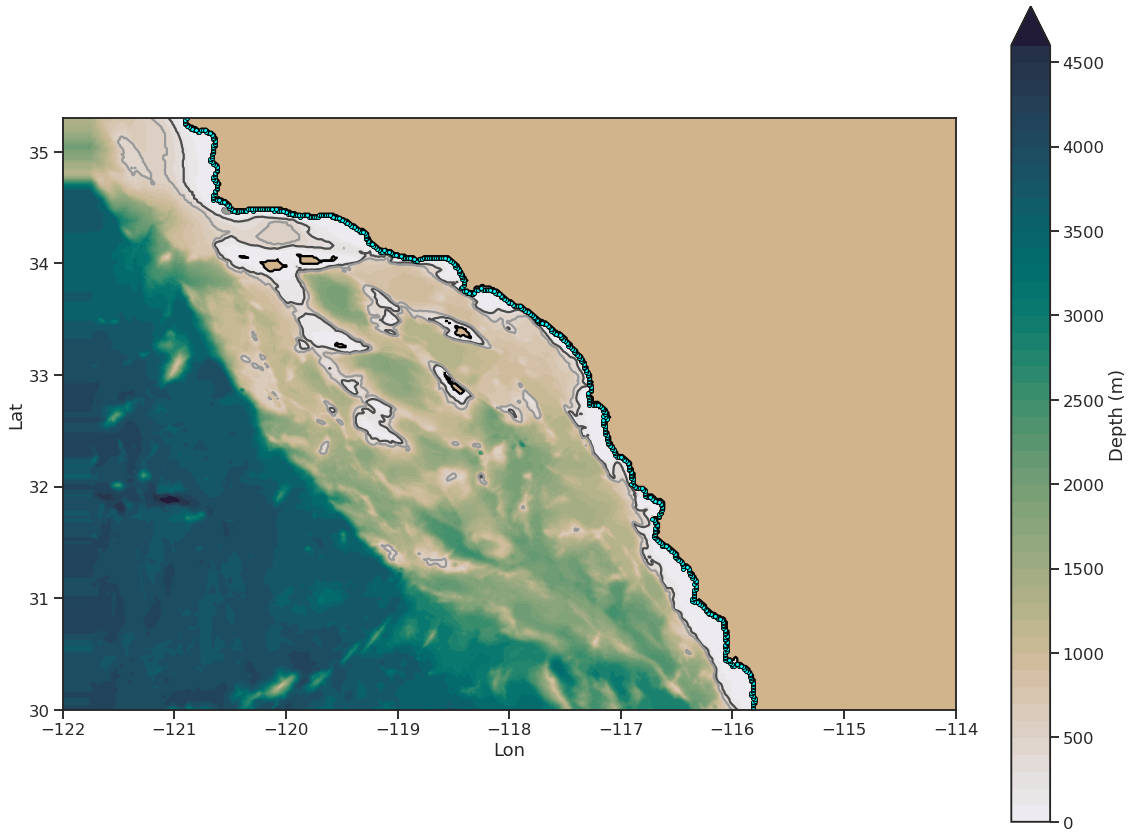

In [26]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(20,15))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj in zip(df.lon_ii[:], df.lat_jj[:]):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)-1],LAT[int(jj)-1,0],'o', 
            markersize=4, color='cyan', markeredgecolor='k')
    print('%d %d Depth at cell is %1.2f m' % (int(ii),int(jj),depth[jj-1,ii-1]))

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(30,35.3)
ax.set_aspect(1)

### Hovmöller 

In [27]:
lon_ii = np.array(df.lon_ii[:])-np.ones_like(df.lon_ii)
lat_jj = np.array(df.lat_jj[:])-np.ones_like(df.lat_jj)

In [28]:
# Distance along the coast (haversine)
def distance(lat1,lon1,lat2,lon2):
    '''Distance Haversine using formula'''
    r = 6371 #radius of Earth (KM)
    p = np.pi/180  #Pi/180
    a = 0.5 - np.cos((lat2-lat1)*p)/2 + np.cos(lat1*p)*np.cos(lat2*p) * (1-np.cos((lon2-lon1)*p)) / 2
    d = 2 * r * np.arcsin(np.sqrt(a)) #2*R*asin In km
    return d

In [29]:
dist_array = np.zeros(len(lon_ii))

for kk in range(1,len(lon_ii)):
    lat1 = lat[lat_jj[kk-1]]
    lon1 = lon[lon_ii[kk-1]]
    lat2 = lat[lat_jj[kk]]
    lon2 = lon[lon_ii[kk]]
    dist_array[kk]=  distance(lat1, lon1, lat2, lon2)

In [30]:
dist_cummul = np.cumsum(dist_array)

In [31]:
# This cell takes a while (about 10 min)
ssh = np.zeros((nt,len(lon_ii)))

for ii,jj,kk in zip(lon_ii, lat_jj, range(len(lon_ii))):
    ssh[:,kk] = ds['ETAN'][:,jj,ii]

In [32]:
print('%1.1e' %distance(lat1,lon1,lat2,lon2))

2.1e+00


Text(0.5, 1.0, 'SVB run - barotropic')

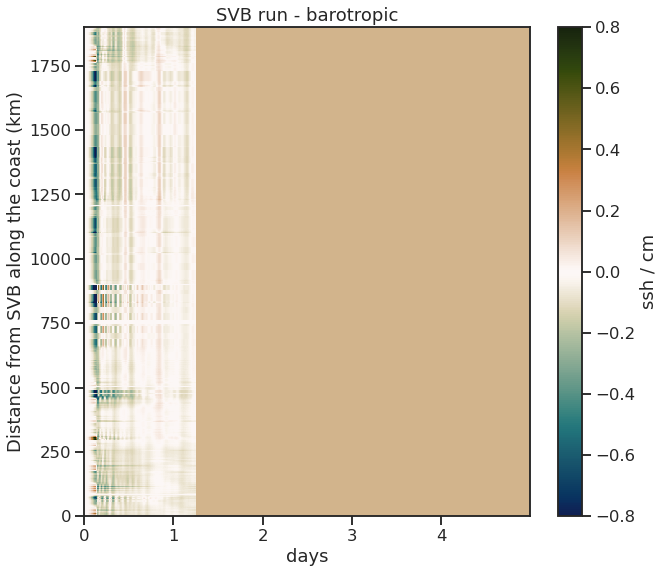

In [33]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600*24),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('SVB run - barotropic')

Text(0.5, 1.0, 'SVB run - barotropic')

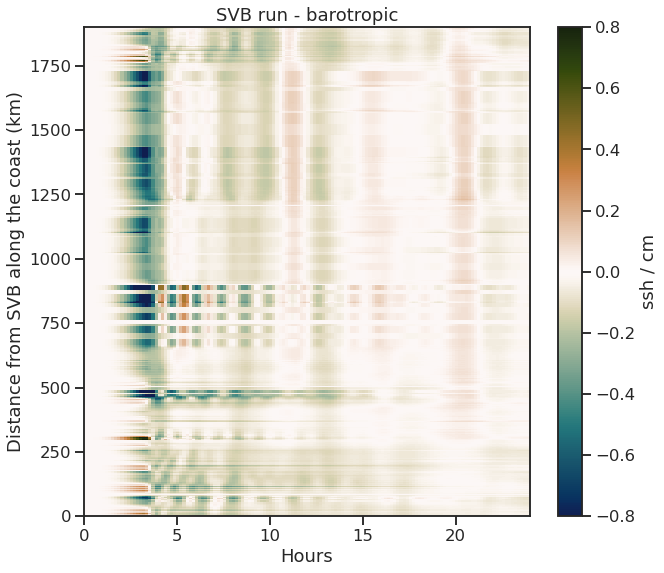

In [34]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose(ssh*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB run - barotropic')

## No SVB run

In [35]:
# This cell takes a while (about 10 min)
ssh_NOB = np.zeros((nt,len(lon_ii)))

for ii,jj,kk in zip(lon_ii, lat_jj, range(len(lon_ii))):
    ssh_NOB[:,kk] = ds2['ETAN'][:,jj,ii]

Text(0.5, 1.0, 'No SVB run - barotropic')

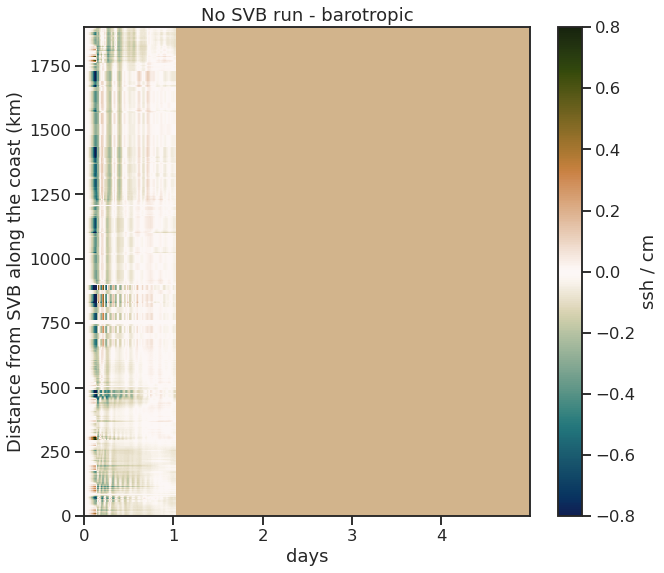

In [36]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600*24),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('days')
ax.set_title('No SVB run - barotropic')

Text(0.5, 1.0, 'No SVB run - barotropic')

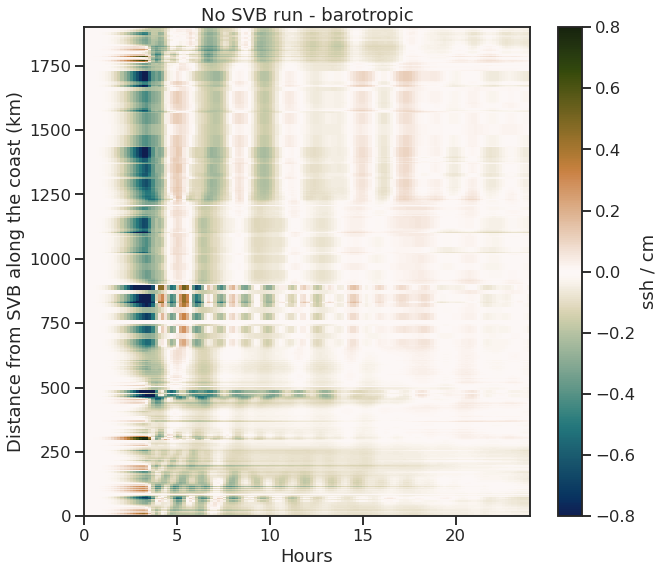

In [37]:
sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose(ssh_NOB*100),
                   vmin=-0.8, vmax=0.8, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('No SVB run - barotropic')

## Bay minus no Bay 

Text(0.5, 1.0, 'SVB-No SVB (barotropic)')

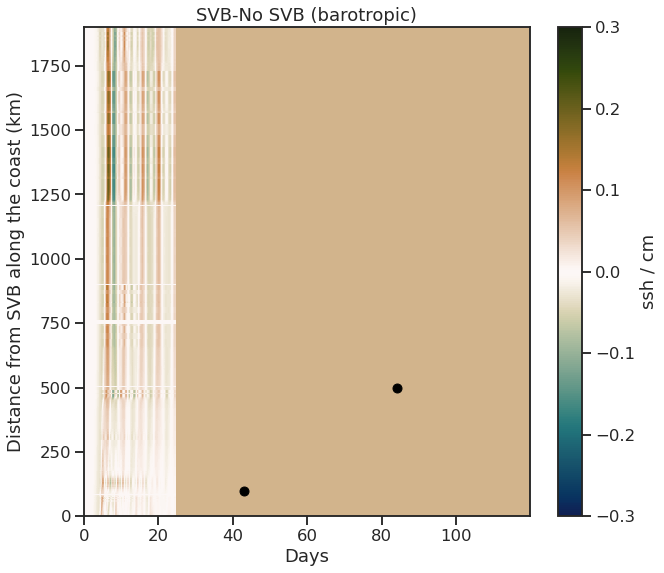

In [38]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')
ax.plot(43,100,'ko')
ax.plot(84,500, 'ko')

ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Days')
ax.set_title('SVB-No SVB (barotropic)')

Text(0.5, 1.0, 'SVB-No SVB (barotropic)')

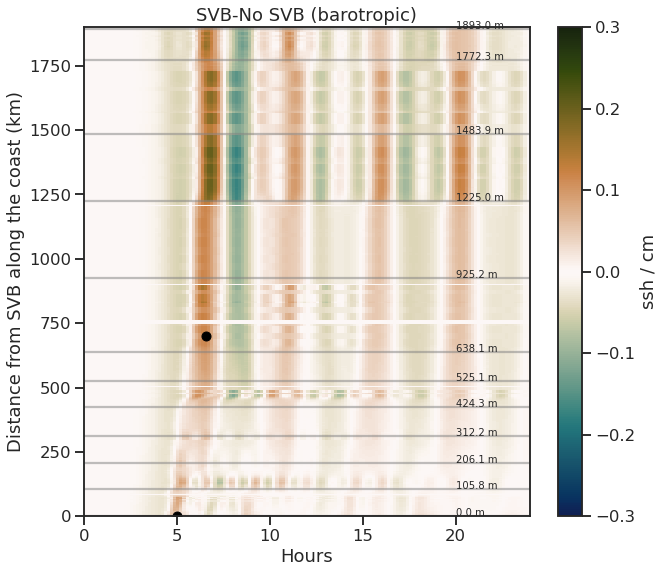

In [39]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.pcolormesh(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100),
                   vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.5)
        ax.text(20,dist_cummul[kk],'%1.1f m' %dist_cummul[kk], fontsize=10)

ax.plot(5,0,'ko')
ax.plot(6.6,700, 'ko')
ax.set_xlim(0,24)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB (barotropic)')

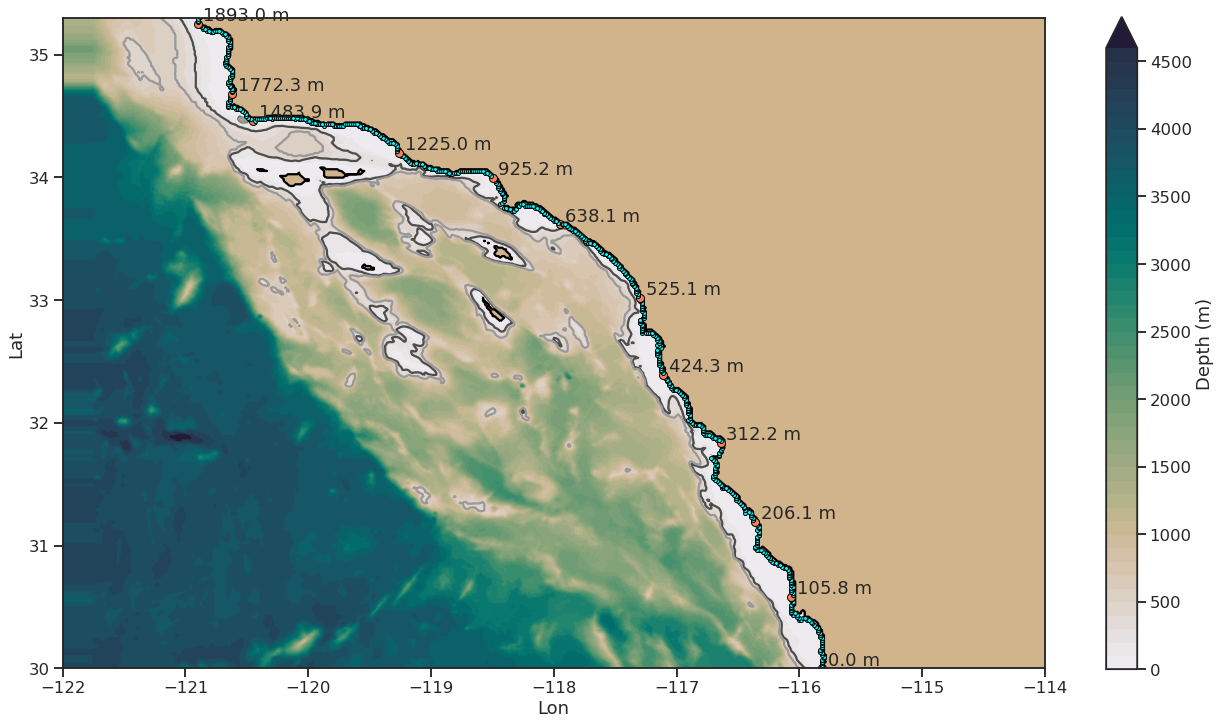

In [40]:
sns.set_style('ticks')
sns.set_context('talk')
fig, ax = plt.subplots(1,1,figsize=(22,12))
ax.set_facecolor('tan')
pc = ax.contourf(LON,LAT,np.ma.masked_array(depthSVB, mask=mask_depSVB),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.rain, extend='max')
cb = plt.colorbar(pc, extend='max',label='depth / m')
cn = ax.contour(LON,LAT,depth, colors=['0.3','0.6'], 
                levels=[250,500])

ax.contour(lon,lat,depthSVB[:,:], levels=[0], colors='k')

# cells along coast(ish)
for ii,jj,kk in zip(lon_ii[:], lat_jj[:],range(len(lon_ii))):
    #print(ii,jj)
    ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
            markersize=4, color='cyan', markeredgecolor='k')
    if kk%50 == 0:
        ax.plot(LON[0,int(ii)],LAT[int(jj),0],'o', 
                markersize=8, color='coral', markeredgecolor='k')
        ax.text(LON[0,int(ii)+3],LAT[int(jj)+2,0],'%1.1f m' %dist_cummul[kk])

cb.set_label('Depth (m)')
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(30,35.3)
ax.set_aspect(1)

Text(0.5, 1.0, 'SVB-No SVB (barotropic)')

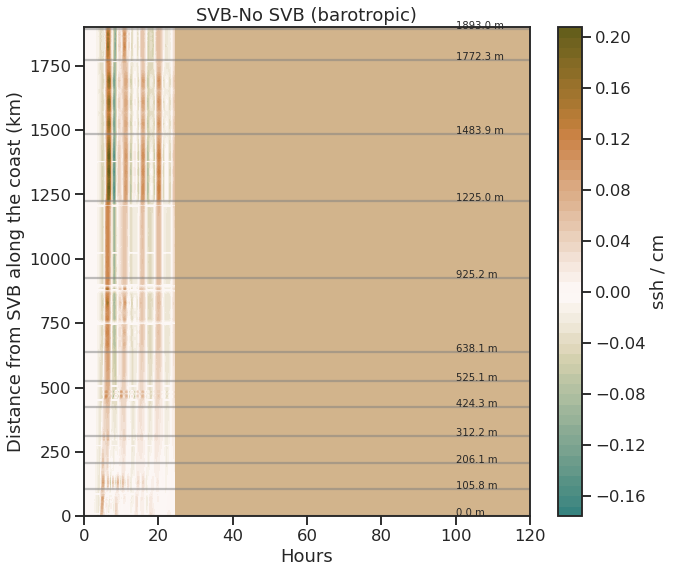

In [41]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.contourf(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100), 61,
                vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.5)
        ax.text(20*5,dist_cummul[kk],'%1.1f m' %dist_cummul[kk], fontsize=10)

ax.set_xlim(0,24*5)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB (barotropic)')

Text(0.5, 1.0, 'SVB-No SVB (barotropic)')

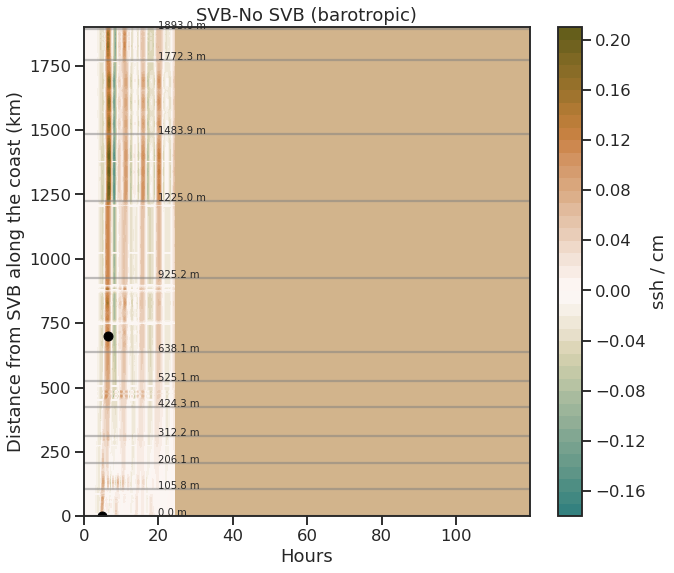

In [42]:
time = np.arange(720)*600

sns.set_style('ticks')
sns.set_context('talk')

fig, ax = plt.subplots(1,1,figsize=(10,9))
ax.set_facecolor('tan')

pc = ax.contourf(time/(3600),dist_cummul,np.transpose((ssh-ssh_NOB)*100), 41,
                vmin=-0.3, vmax=0.3, cmap=cmo.cm.tarn_r)
cb = plt.colorbar(pc,label='ssh / cm')


# cells along coast(ish)
for kk in range(len(lon_ii)):
    if kk%50 == 0:
        ax.axhline(dist_cummul[kk],color='0.5',alpha=0.5)
        ax.text(20,dist_cummul[kk],'%1.1f m' %dist_cummul[kk], fontsize=10)

ax.plot(5,0,'ko')
ax.plot(6.6,700, 'ko')
ax.set_xlim(0,)
ax.set_ylabel('Distance from SVB along the coast (km)')
ax.set_xlabel('Hours')
ax.set_title('SVB-No SVB (barotropic)')

In [43]:
400/(84-43) # km/h

9.75609756097561

In [44]:
9.7/3.6

2.694444444444444